# 6.6 Sourcing & Analyzing Time-Series Data

## 1. Importing libraries and data
## 2. Subsetting, wrangling, and cleaning data
## 3. Time series analysis: decomposition
## 4. Testing for stationarity
## 5. Stationarizing the dataset

## 1. Importing libraries and data

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [21]:
path = r'C:\Users\User\250104_Global Internet Access Analysis'

In [22]:
df_internet = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'final_dataset.csv'))

In [23]:
df_internet.head()

,Unnamed: 0,Country Name,Country Code,Region,IncomeGroup,Year,Internet_Users,GDP_Per_Capita,Electricity_Access,Electricity_Access_Rural,...,Literacy_Male,Literacy_Total,Pop_0_14,Pop_15_64,Pop_65_Above,Pop_Female,Pop_Male,Pop_Total,Pop_Rural,Pop_Urban
0,0,Afghanistan,AFG,South Asia,Low income,2012,5.45455,1988.429304,69.1,60.8,...,85.479461,81.376306,47.605305,50.056783,2.337911,49.499771,50.500229,30560034.0,75.840,24.160
1,1,Afghanistan,AFG,South Asia,Low income,2013,5.90000,2133.241271,68.0,60.2,...,85.479461,81.376306,47.161386,50.488845,2.349769,49.482650,50.517350,31622704.0,75.627,24.373
2,2,Afghanistan,AFG,South Asia,Low income,2014,7.00000,2224.490748,89.5,86.5,...,85.479461,81.376306,46.713066,50.930398,2.356536,49.468115,50.531885,32792523.0,75.413,24.587
3,3,Afghanistan,AFG,South Asia,Low income,2015,8.26000,2284.075848,71.5,64.6,...,50.212101,33.753841,46.259337,51.383968,2.356695,49.457202,50.542798,33831764.0,75.197,24.803
4,4,Afghanistan,AFG,South Asia,Low income,2016,11.00000,2213.181441,97.7,97.1,...,85.479461,81.376306,45.801449,51.843054,2.355497,49.449550,50.550450,34700612.0,74.980,25.020


In [24]:
df_internet.head()

,Unnamed: 0,Country Name,Country Code,Region,IncomeGroup,Year,Internet_Users,GDP_Per_Capita,Electricity_Access,Electricity_Access_Rural,...,Literacy_Male,Literacy_Total,Pop_0_14,Pop_15_64,Pop_65_Above,Pop_Female,Pop_Male,Pop_Total,Pop_Rural,Pop_Urban
0,0,Afghanistan,AFG,South Asia,Low income,2012,5.45455,1988.429304,69.1,60.8,...,85.479461,81.376306,47.605305,50.056783,2.337911,49.499771,50.500229,30560034.0,75.840,24.160
1,1,Afghanistan,AFG,South Asia,Low income,2013,5.90000,2133.241271,68.0,60.2,...,85.479461,81.376306,47.161386,50.488845,2.349769,49.482650,50.517350,31622704.0,75.627,24.373
2,2,Afghanistan,AFG,South Asia,Low income,2014,7.00000,2224.490748,89.5,86.5,...,85.479461,81.376306,46.713066,50.930398,2.356536,49.468115,50.531885,32792523.0,75.413,24.587
3,3,Afghanistan,AFG,South Asia,Low income,2015,8.26000,2284.075848,71.5,64.6,...,50.212101,33.753841,46.259337,51.383968,2.356695,49.457202,50.542798,33831764.0,75.197,24.803
4,4,Afghanistan,AFG,South Asia,Low income,2016,11.00000,2213.181441,97.7,97.1,...,85.479461,81.376306,45.801449,51.843054,2.355497,49.449550,50.550450,34700612.0,74.980,25.020


## 2. Subsetting, wrangling and cleaning data

In [26]:
df_internet.rename(columns = {'Country Name' : 'Country_Name', 'Country Code': 'Country_Code', 'IncomeGroup' : 'Income_Group'}, inplace= True)

In [27]:
df_internet.head()

,Unnamed: 0,Country_Name,Country_Code,Region,Income_Group,Year,Internet_Users,GDP_Per_Capita,Electricity_Access,Electricity_Access_Rural,...,Literacy_Male,Literacy_Total,Pop_0_14,Pop_15_64,Pop_65_Above,Pop_Female,Pop_Male,Pop_Total,Pop_Rural,Pop_Urban
0,0,Afghanistan,AFG,South Asia,Low income,2012,5.45455,1988.429304,69.1,60.8,...,85.479461,81.376306,47.605305,50.056783,2.337911,49.499771,50.500229,30560034.0,75.840,24.160
1,1,Afghanistan,AFG,South Asia,Low income,2013,5.90000,2133.241271,68.0,60.2,...,85.479461,81.376306,47.161386,50.488845,2.349769,49.482650,50.517350,31622704.0,75.627,24.373
2,2,Afghanistan,AFG,South Asia,Low income,2014,7.00000,2224.490748,89.5,86.5,...,85.479461,81.376306,46.713066,50.930398,2.356536,49.468115,50.531885,32792523.0,75.413,24.587
3,3,Afghanistan,AFG,South Asia,Low income,2015,8.26000,2284.075848,71.5,64.6,...,50.212101,33.753841,46.259337,51.383968,2.356695,49.457202,50.542798,33831764.0,75.197,24.803
4,4,Afghanistan,AFG,South Asia,Low income,2016,11.00000,2213.181441,97.7,97.1,...,85.479461,81.376306,45.801449,51.843054,2.355497,49.449550,50.550450,34700612.0,74.980,25.020


In [28]:
df_internet.isnull().sum()

Unnamed: 0                    0
Country_Name                  0
Country_Code                  0
Region                      391
Income_Group                391
Year                          0
Internet_Users                0
GDP_Per_Capita                0
Electricity_Access            0
Electricity_Access_Rural      0
Electricity_Access_Urban      0
Broadband_Subscriptions       0
Life_Expectancy               0
Sec_Edu_Duration              0
Literacy_Female               0
Literacy_Male                 0
Literacy_Total                0
Pop_0_14                      0
Pop_15_64                     0
Pop_65_Above                  0
Pop_Female                    0
Pop_Male                      0
Pop_Total                     0
Pop_Rural                     0
Pop_Urban                     0
dtype: int64

In [29]:
# Remove rows where Region or Income_Group have missing values
df_cleaned = df_internet.dropna(subset=["Region", "Income_Group"])

In [30]:
df_cleaned.isnull().sum()

Unnamed: 0                  0
Country_Name                0
Country_Code                0
Region                      0
Income_Group                0
Year                        0
Internet_Users              0
GDP_Per_Capita              0
Electricity_Access          0
Electricity_Access_Rural    0
Electricity_Access_Urban    0
Broadband_Subscriptions     0
Life_Expectancy             0
Sec_Edu_Duration            0
Literacy_Female             0
Literacy_Male               0
Literacy_Total              0
Pop_0_14                    0
Pop_15_64                   0
Pop_65_Above                0
Pop_Female                  0
Pop_Male                    0
Pop_Total                   0
Pop_Rural                   0
Pop_Urban                   0
dtype: int64

In [31]:
df_cleaned.dtypes

Unnamed: 0                    int64
Country_Name                 object
Country_Code                 object
Region                       object
Income_Group                 object
Year                          int64
Internet_Users              float64
GDP_Per_Capita              float64
Electricity_Access          float64
Electricity_Access_Rural    float64
Electricity_Access_Urban    float64
Broadband_Subscriptions     float64
Life_Expectancy             float64
Sec_Edu_Duration            float64
Literacy_Female             float64
Literacy_Male               float64
Literacy_Total              float64
Pop_0_14                    float64
Pop_15_64                   float64
Pop_65_Above                float64
Pop_Female                  float64
Pop_Male                    float64
Pop_Total                   float64
Pop_Rural                   float64
Pop_Urban                   float64
dtype: object

In [32]:
df_cleaned.head()

,Unnamed: 0,Country_Name,Country_Code,Region,Income_Group,Year,Internet_Users,GDP_Per_Capita,Electricity_Access,Electricity_Access_Rural,...,Literacy_Male,Literacy_Total,Pop_0_14,Pop_15_64,Pop_65_Above,Pop_Female,Pop_Male,Pop_Total,Pop_Rural,Pop_Urban
0,0,Afghanistan,AFG,South Asia,Low income,2012,5.45455,1988.429304,69.1,60.8,...,85.479461,81.376306,47.605305,50.056783,2.337911,49.499771,50.500229,30560034.0,75.840,24.160
1,1,Afghanistan,AFG,South Asia,Low income,2013,5.90000,2133.241271,68.0,60.2,...,85.479461,81.376306,47.161386,50.488845,2.349769,49.482650,50.517350,31622704.0,75.627,24.373
2,2,Afghanistan,AFG,South Asia,Low income,2014,7.00000,2224.490748,89.5,86.5,...,85.479461,81.376306,46.713066,50.930398,2.356536,49.468115,50.531885,32792523.0,75.413,24.587
3,3,Afghanistan,AFG,South Asia,Low income,2015,8.26000,2284.075848,71.5,64.6,...,50.212101,33.753841,46.259337,51.383968,2.356695,49.457202,50.542798,33831764.0,75.197,24.803
4,4,Afghanistan,AFG,South Asia,Low income,2016,11.00000,2213.181441,97.7,97.1,...,85.479461,81.376306,45.801449,51.843054,2.355497,49.449550,50.550450,34700612.0,74.980,25.020


In [33]:
df = df_cleaned.drop(columns = ['Unnamed: 0'])

In [34]:
df.dtypes

Country_Name                 object
Country_Code                 object
Region                       object
Income_Group                 object
Year                          int64
Internet_Users              float64
GDP_Per_Capita              float64
Electricity_Access          float64
Electricity_Access_Rural    float64
Electricity_Access_Urban    float64
Broadband_Subscriptions     float64
Life_Expectancy             float64
Sec_Edu_Duration            float64
Literacy_Female             float64
Literacy_Male               float64
Literacy_Total              float64
Pop_0_14                    float64
Pop_15_64                   float64
Pop_65_Above                float64
Pop_Female                  float64
Pop_Male                    float64
Pop_Total                   float64
Pop_Rural                   float64
Pop_Urban                   float64
dtype: object

In [35]:
# Save the cleaned dataset
df=df_cleaned.to_csv(os.path.join(path, '02 Data','Prepared Data', 'clean_final_dataset.csv'), index=False)

In [36]:
# Create a subset with the desired columns
# Create a subset with only India and the relevant columns
df_brazil = df_cleaned[df_cleaned["Country_Name"] == "Brazil"][["Year", "Internet_Users"]]

## Subsetting explanation:
I needed to reduce the country data points otherwise there would have been well over 200 lines in the plot making it unreadale. Brazil was one of the countries that interested me that had no missing year data. That is why I chose Brazil The whole point of my dataset is to see the influence different variables have on the internet usage, that is why I chose this variable to plot. 

In [38]:
df_brazil.head()

,Year,Internet_Users
265,2012,48.5600
266,2013,51.0400
267,2014,54.5510
268,2015,58.3280
269,2016,60.8725


In [39]:
# Turn df_sub into data frame
df_sub = df_brazil.reset_index(drop=True)
df_sub

,Year,Internet_Users
0,2012,48.5600
1,2013,51.0400
2,2014,54.5510
3,2015,58.3280
4,2016,60.8725
5,2017,67.4713
6,2018,70.4343
7,2019,73.9124
8,2020,81.3427
9,2021,80.6899


In [40]:
df_sub['datetime'] = pd.to_datetime(df_sub['Year'], format='%Y') # Create a datetime column from "Year"
df_sub = df_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
df_sub.drop(['Year'], axis=1, inplace=True) # Drop the "Date" column.
df_sub.head()

,Internet_Users
datetime,
2012-01-01,48.5600
2013-01-01,51.0400
2014-01-01,54.5510
2015-01-01,58.3280
2016-01-01,60.8725


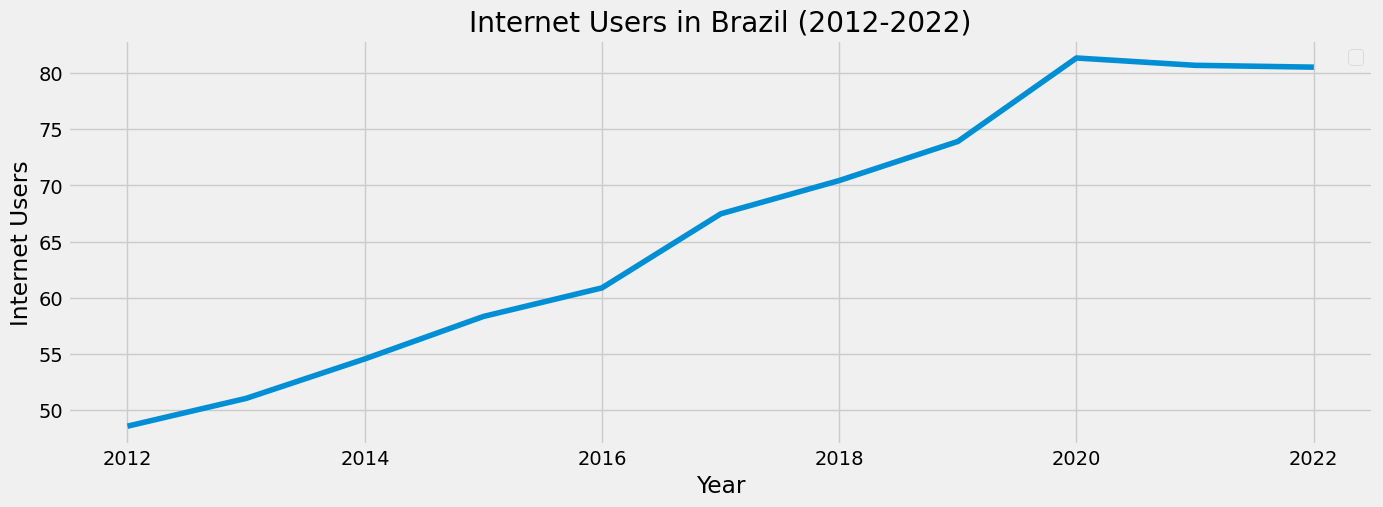

In [41]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

plt.legend()
plt.title("Internet Users in Brazil (2012-2022)")
plt.xlabel("Year")
plt.ylabel("Internet Users")
plt.show()

In [42]:
df_sub.isnull().sum()

Internet_Users    0
dtype: int64

In [43]:
df_sub.columns

Index(['Internet_Users'], dtype='object')

## 3. Time series analysis: decomposition

In [45]:
print(df_sub.index)  # Check if the index already contains yearly dates
print(df_sub.index.dtype)  # Verify if it's a datetime type

DatetimeIndex(['2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01', '2021-01-01', '2022-01-01'],
              dtype='datetime64[ns]', name='datetime', freq=None)
datetime64[ns]


In [46]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_sub, model='additive')

In [47]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

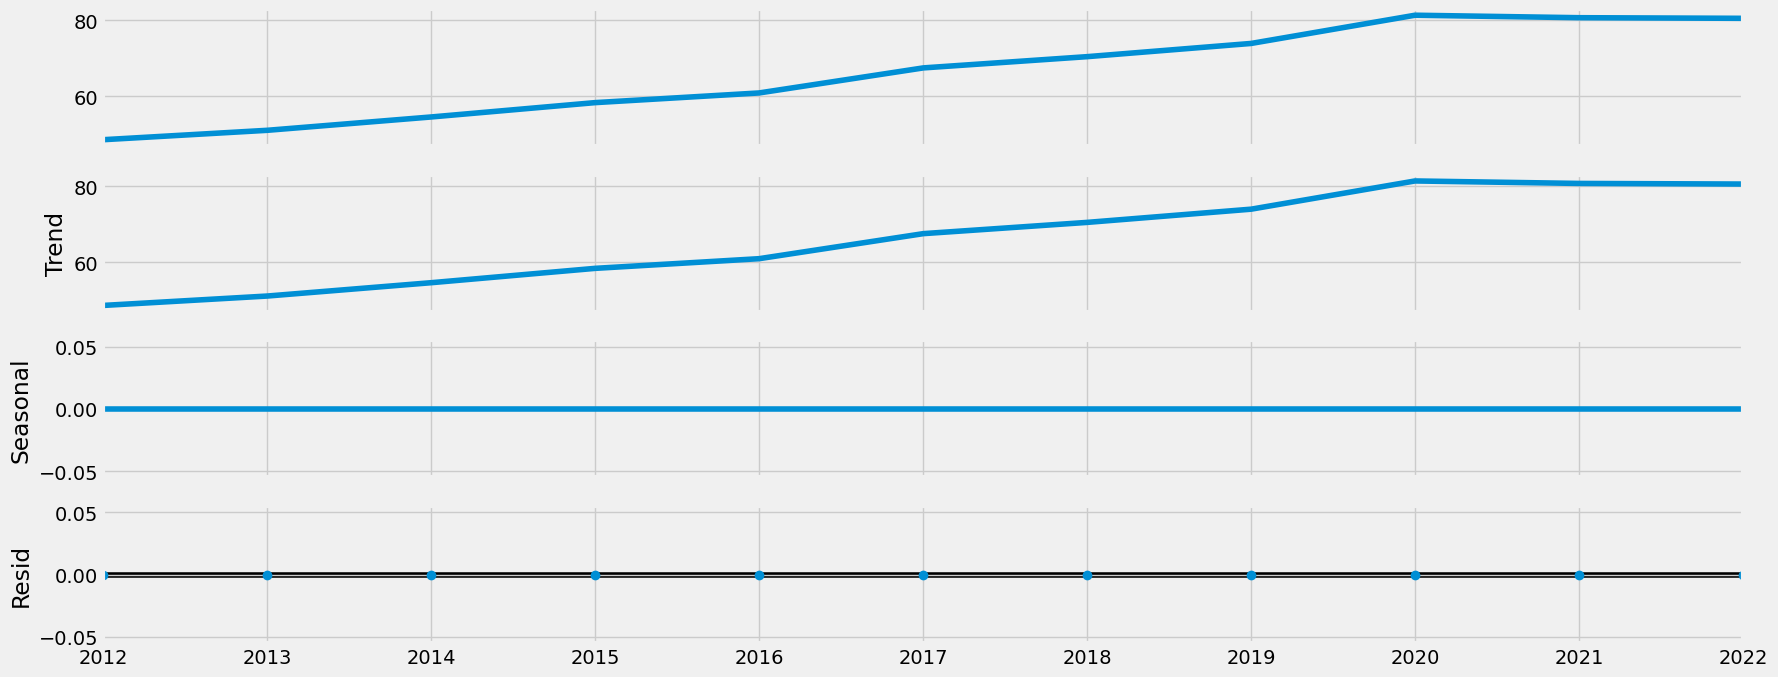

In [48]:
# Plot the separate components

decomposition.plot()
plt.show()

## Decomposition explanation
The first chart is the level. This is just the data itself including all its components.
The second chart is the trend. There is a gradual increase over time that plateaus in the year 2020, possibly due to the Corona Pandemic. The trend line compared to the level are very similar.
The third chart is the seasonality. There is no seasonality in this data.
The 4th chart is the noise or "residual'. There is no noise what so ever not even in the Corona period startin from 2020, which is a bit astonishing.

Given the presence of the upward trend this data is considered non-stationary even if it plateaus at 800% in 2020. 

## 4. Testing for Stationarity

In [51]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub['Internet_Users'])

Dickey-Fuller Stationarity test:
Test Statistic                -2.461797
p-value                        0.125048
Number of Lags Used            3.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


## Dickey Fuller test interpretation
The test statistic is much larger than the critical value of 5%, so I cannot reject my null hypotesis.
Null hypothesis: there is a root unit = random jump that cannot be explained by variation in the data.
This means the data is non-stationary

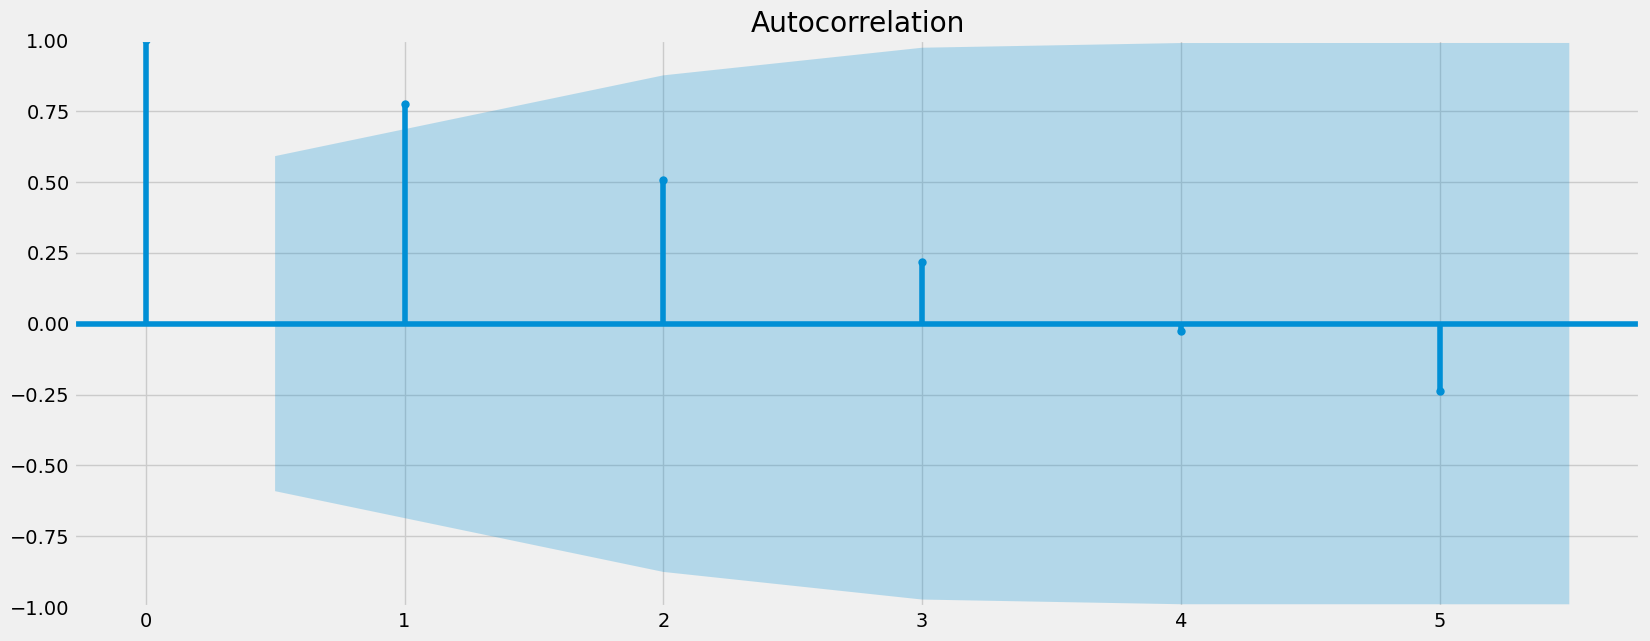

In [53]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_sub)
plt.show()

## 5. Stationarizing the dataset

In [55]:
data_diff = df_sub - df_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [56]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [57]:
data_diff.head()

,Internet_Users
datetime,
2013-01-01,2.4800
2014-01-01,3.5110
2015-01-01,3.7770
2016-01-01,2.5445
2017-01-01,6.5988


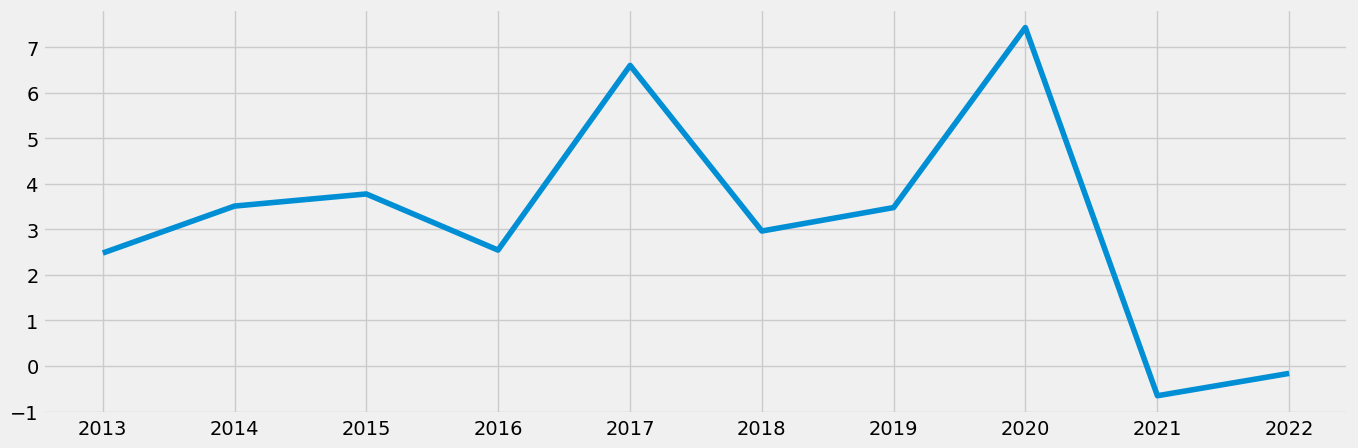

In [58]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [59]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -2.709569
p-value                        0.072397
Number of Lags Used            1.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


## Data is not stationary yet so I do another round of differencing.

In [61]:
data_diff2 = data_diff - data_diff.shift(1)  # Second-order differencing
data_diff2.dropna(inplace=True)  # Remove NaN values

In [62]:
data_diff2.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

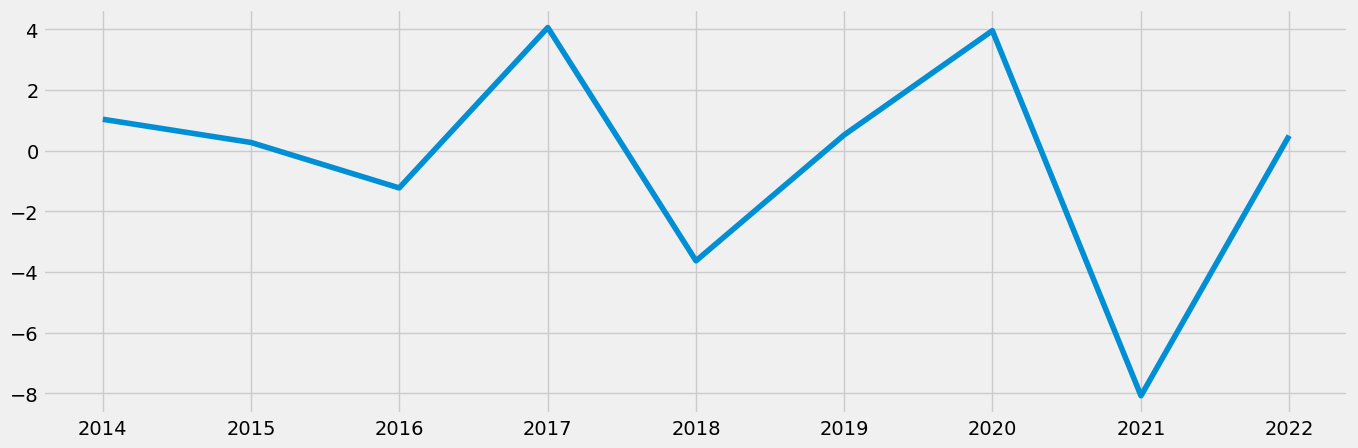

In [63]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [64]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                 0.398574
p-value                        0.981442
Number of Lags Used            2.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


## Data is still not stationary

In [66]:
data_diff3 = data_diff2 - data_diff2.shift(1)  # Second-order differencing
data_diff3.dropna(inplace=True)  # Remove NaN values

In [67]:
data_diff3.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

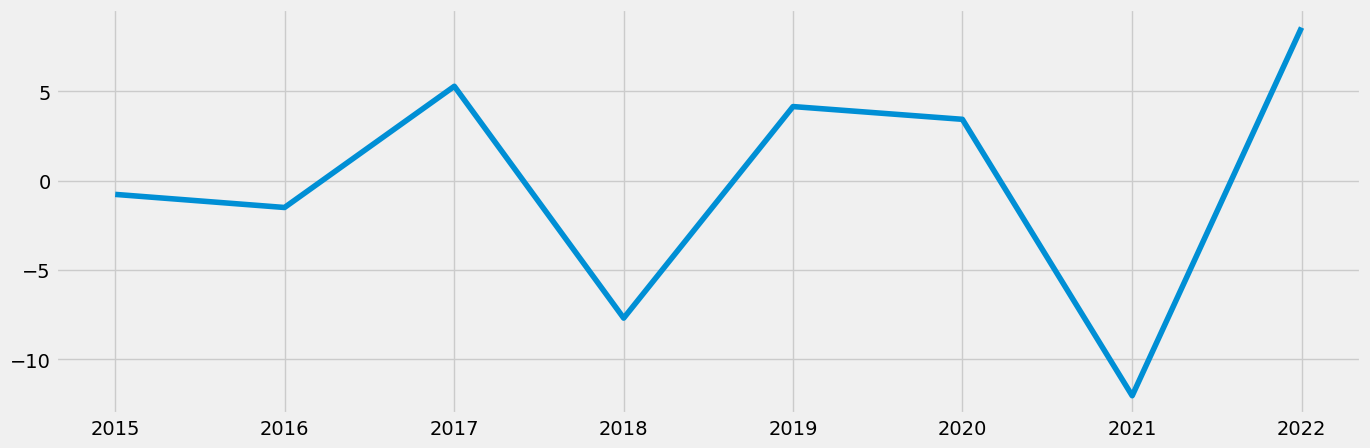

In [107]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff3)

In [109]:
dickey_fuller(data_diff3)

Dickey-Fuller Stationarity test:
Test Statistic                -8.113245e+00
p-value                        1.209940e-12
Number of Lags Used            1.000000e+00
Number of Observations Used    6.000000e+00
Critical Value (1%)           -5.354256e+00
Critical Value (5%)           -3.646238e+00
Critical Value (10%)          -2.901198e+00
dtype: float64


## Now the test statistic is smaller than the critical value, I can reject the null hypothesis, which means the data is stationary